<a href="https://colab.research.google.com/github/mspatke/Deep-Learning-with-Pytorch/blob/main/12_Convolutional_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transform
import matplotlib.pyplot as plt

In [3]:
#Device Configuration

device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
device

device(type='cuda')

In [5]:
#Hyper parameters

input_size = 784 # 28*28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 2
learning_rate = 0.001

In [ ]:
#MNIST Dataset

train_dataset = torchvision.datasets.MNIST(root= './',
                                           train = True ,
                                           transform= transform.ToTensor(),
                                           download=True)

In [8]:

test_dataset = torchvision.datasets.MNIST(root= './',
                                          train = False ,
                                          transform= transform.ToTensor())

In [9]:
#Data loader

train_loader = torch.utils.data.DataLoader(dataset= train_dataset,
                                           batch_size=batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset= test_dataset,
                                           batch_size=batch_size,
                                           shuffle = True)

In [10]:
examples = iter(test_loader)

example_data , example_targets = examples.next()

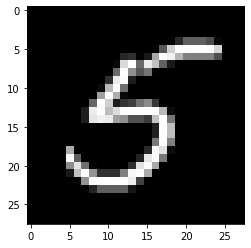

In [16]:
plt.imshow(example_data[0][0], cmap ='gray')

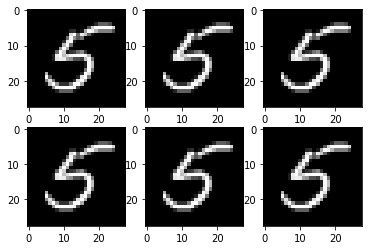

In [24]:
# for i in range(6):
#   plt.subplot(2,3,i+1)
#   plt.imshow(example_data[0, 0], cmap='gray')
# plt.show()

In [25]:
#Fully connected neural Network with one hideen layer:

class NeuralNet(nn.Module):

  def __init__ (self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.input_size = input_size
    self.l1 = nn.Linear(input_size , hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)


  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)

    return out


In [26]:
model = NeuralNet(input_size , hidden_size , num_classes).to(device)

In [27]:
#Loss and Optimizer

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)

In [28]:
# Train the model

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # origin shape: [100, 1,28, 28]
    # resized: [100, 784]
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    #forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(i+1)%100 ==0:
      print(f'Epoch[{epoch+1}/{num_epochs}], step [{i+1}/{n_total_steps}], Loss:{loss.item():.4f}')

Epoch[1/2], step [100/30000], Loss:2.3704
Epoch[1/2], step [200/30000], Loss:0.9116
Epoch[1/2], step [300/30000], Loss:1.8055
Epoch[1/2], step [400/30000], Loss:0.0698
Epoch[1/2], step [500/30000], Loss:0.1023
Epoch[1/2], step [600/30000], Loss:2.7192
Epoch[1/2], step [700/30000], Loss:0.4737
Epoch[1/2], step [800/30000], Loss:0.5527
Epoch[1/2], step [900/30000], Loss:0.0427
Epoch[1/2], step [1000/30000], Loss:0.9278
Epoch[1/2], step [1100/30000], Loss:1.8450
Epoch[1/2], step [1200/30000], Loss:0.0319
Epoch[1/2], step [1300/30000], Loss:0.0438
Epoch[1/2], step [1400/30000], Loss:0.4889
Epoch[1/2], step [1500/30000], Loss:0.0421
Epoch[1/2], step [1600/30000], Loss:0.0073
Epoch[1/2], step [1700/30000], Loss:0.0692
Epoch[1/2], step [1800/30000], Loss:0.0022
Epoch[1/2], step [1900/30000], Loss:0.6100
Epoch[1/2], step [2000/30000], Loss:0.0126
Epoch[1/2], step [2100/30000], Loss:0.0235
Epoch[1/2], step [2200/30000], Loss:0.0081
Epoch[1/2], step [2300/30000], Loss:0.0373
Epoch[1/2], step [24

In [29]:
#test the model

#in test phase we dont need to calculate the gradients(for memory efficiency)

with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for images, lables in test_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    #max returns(value, index)

    _, predicted = torch.max(outputs.data, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 10.02 %
